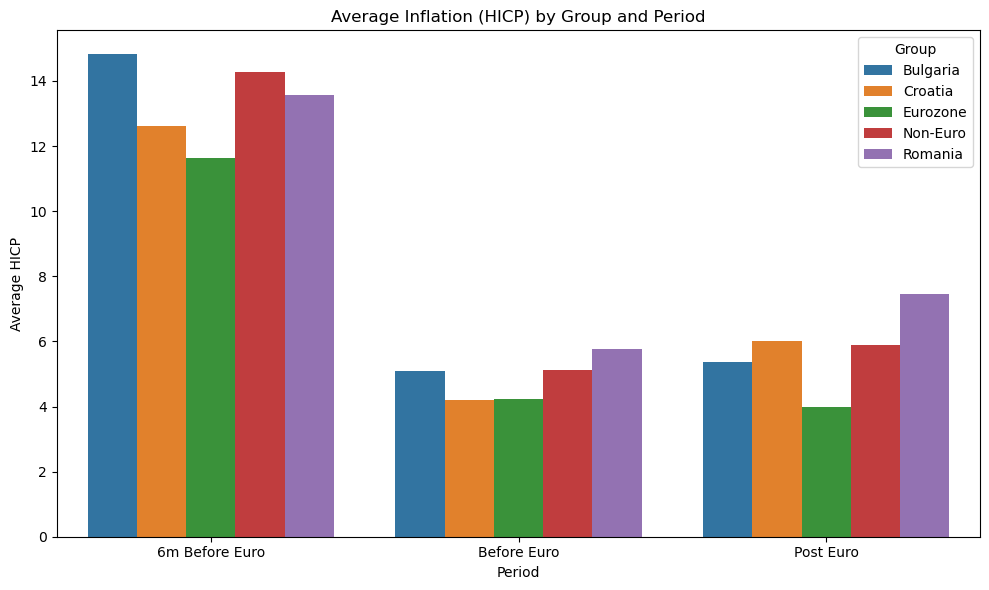

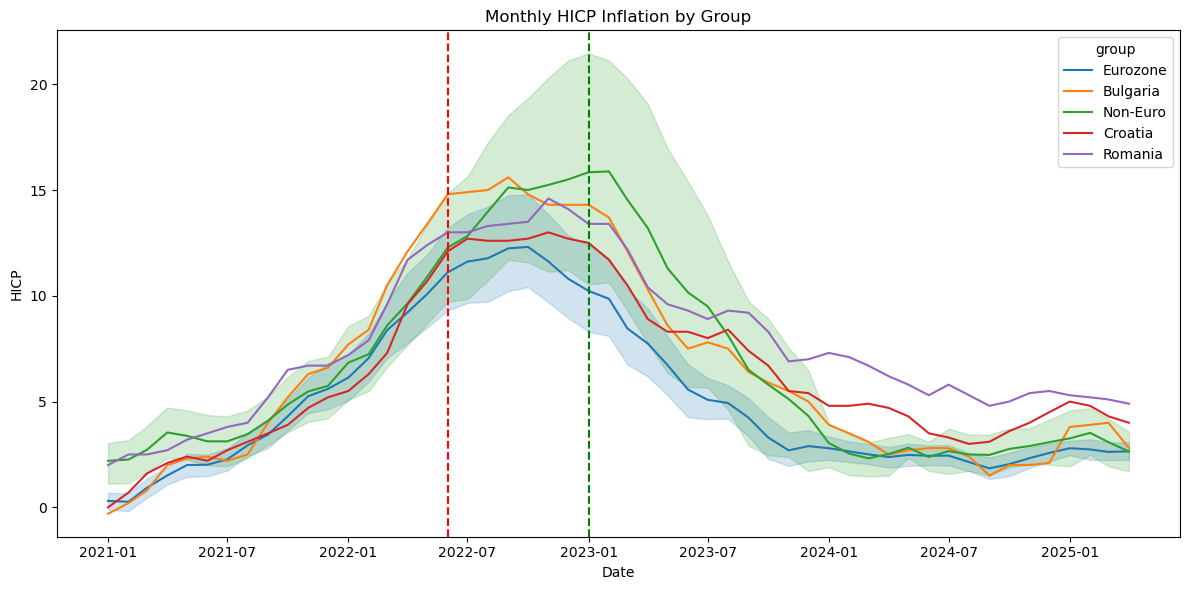

T-test between Before and Post Euro periods for Croatia: t=-2.06, p-value=0.0481


In [2]:
# Euro Adoption and Inflation Analysis in Croatia vs EU Countries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Load real Eurostat dataset
df_raw = pd.read_csv("data/estat_prc_hicp_manr_filtered_en_up_to_2025_04.csv")

# Map EU country names to ISO codes (simplified list)
country_code_map = {
    'Austria': 'AT', 'Belgium': 'BE', 'Bulgaria': 'BG', 'Croatia': 'HR', 'Cyprus': 'CY',
    'Czechia': 'CZ', 'Denmark': 'DK', 'Estonia': 'EE', 'Finland': 'FI', 'France': 'FR',
    'Germany': 'DE', 'Greece': 'GR', 'Hungary': 'HU', 'Ireland': 'IE', 'Italy': 'IT',
    'Latvia': 'LV', 'Lithuania': 'LT', 'Luxembourg': 'LU', 'Malta': 'MT', 'Netherlands': 'NL',
    'Poland': 'PL', 'Portugal': 'PT', 'Romania': 'RO', 'Slovakia': 'SK', 'Slovenia': 'SI',
    'Spain': 'ES', 'Sweden': 'SE'
}

# Filter for relevant countries only
df_raw = df_raw[df_raw['geo'].isin(country_code_map.keys())]

# Rename and format

# Create new DataFrame
processed_df = pd.DataFrame({
    'country': df_raw['geo'].map(country_code_map),
    'date': pd.to_datetime(df_raw['TIME_PERIOD']),
    'hicp': df_raw['OBS_VALUE']
})

# Define country groups
eurozone = ['AT', 'BE', 'CY', 'EE', 'FI', 'FR', 'DE', 'GR', 'IE', 'IT', 'LV', 'LT', 'LU', 'MT', 'NL', 'PT', 'SK', 'SI', 'ES']
non_euro = ['CZ', 'DK', 'HU', 'PL', 'RO', 'SE']
croatia = ['HR']
bulgaria = ['BG']
romania = ['RO']

# Add group column
def assign_group(country):
    if country in croatia:
        return 'Croatia'
    elif country in bulgaria:
        return 'Bulgaria'
    elif country in romania:
        return 'Romania'    
    elif country in eurozone:
        return 'Eurozone'
    elif country in non_euro:
        return 'Non-Euro'
    else:
        return 'Other'

processed_df['group'] = processed_df['country'].apply(assign_group)

# Define periods
periods = {
    "Before Euro": ("2021-01-01", "2022-05-31"),
    "6m Before Euro": ("2022-06-01", "2022-12-31"),
    "Post Euro": ("2023-01-01", "2025-04-30")
}

def assign_period(date):
    for period_name, (start, end) in periods.items():
        if pd.to_datetime(start) <= date <= pd.to_datetime(end):
            return period_name
    return 'Outside'

processed_df['period'] = processed_df['date'].apply(assign_period)

# Filter relevant periods
processed_df = processed_df[processed_df['period'] != 'Outside']

# --- Analysis ---

# Average inflation per group and period
group_period_avg = processed_df.groupby(['group', 'period'])['hicp'].mean().reset_index()

# Plot average inflation per period per group
plt.figure(figsize=(10, 6))
sns.barplot(data=group_period_avg, x='period', y='hicp', hue='group')
plt.title('Average Inflation (HICP) by Group and Period')
plt.ylabel('Average HICP')
plt.xlabel('Period')
plt.legend(title='Group')
plt.tight_layout()
plt.show()

# Plot monthly trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=processed_df, x='date', y='hicp', hue='group')
plt.axvline(pd.to_datetime('2022-06-01'), color='red', linestyle='--', label='June 2022')
plt.axvline(pd.to_datetime('2023-01-01'), color='green', linestyle='--', label='January 2023')
plt.title('Monthly HICP Inflation by Group')
plt.ylabel('HICP')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

# --- Statistical Testing: Croatia before vs after Euro ---
croatia_df = processed_df[processed_df['group'] == 'Croatia']

before = croatia_df[croatia_df['period'] == 'Before Euro']['hicp']
after = croatia_df[croatia_df['period'] == 'Post Euro']['hicp']

stat, pval = ttest_ind(before, after, equal_var=False)
print(f"T-test between Before and Post Euro periods for Croatia: t={stat:.2f}, p-value={pval:.4f}")


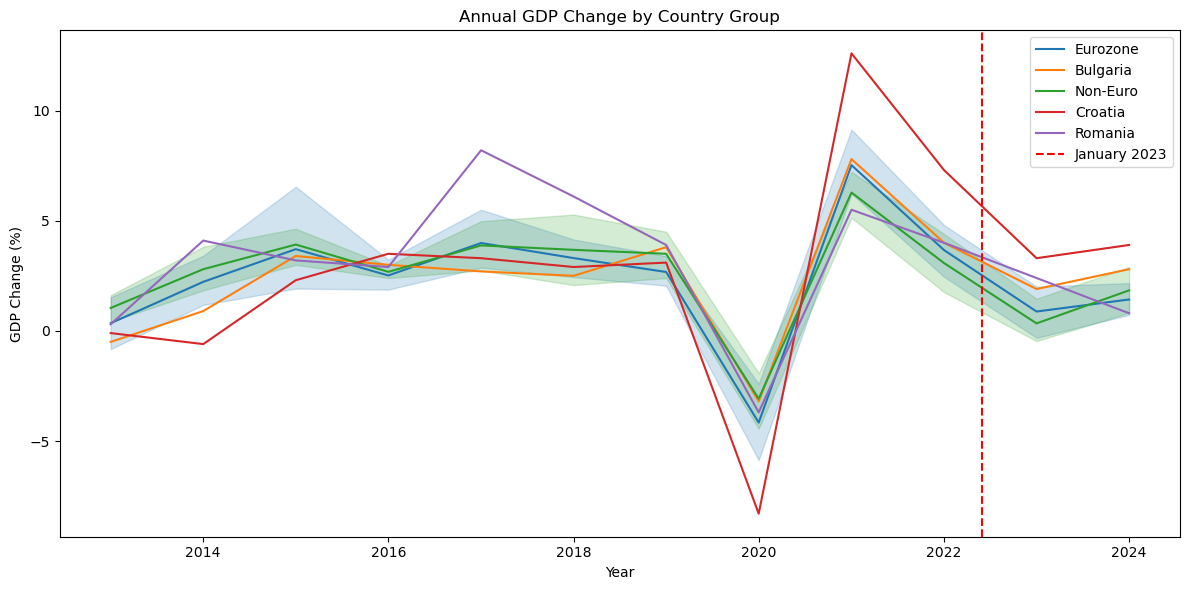

In [3]:
# Load GDP data
gdp_df = pd.read_csv("data/gdp_change_per_year.csv")

# Filter, map and structure data
gdp_df = gdp_df[gdp_df['geo'].isin(country_code_map.keys())]
gdp_df = pd.DataFrame({
    'country': gdp_df['geo'].map(country_code_map),
    'date': pd.to_datetime(gdp_df['TIME_PERIOD'].astype(str) + "-01-01"),
    'gdp_change': gdp_df['OBS_VALUE']
})
gdp_df['group'] = gdp_df['country'].apply(assign_group)

# Plot GDP trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=gdp_df, x='date', y='gdp_change', hue='group')
plt.axvline(pd.to_datetime("2022-06-01"), color='red', linestyle='--', label='January 2023')
plt.title("Annual GDP Change by Country Group")
plt.xlabel("Year")
plt.ylabel("GDP Change (%)")
plt.legend()
plt.tight_layout()
plt.show()
